In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc



In [2]:
# Load the dataset
X = pd.read_csv('CC_GENERAL.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis=1)

# Handling the missing values by forward fill method
X.fillna(method='ffill', inplace=True)

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
DataFrameX_normalized = pd.DataFrame(X_normalized)



C:\Users\PRASAD\AppData\Local\Temp\ipykernel_20800\3561839939.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [3]:
# Reducing the dimensionality of the data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)

# Converting PCA result to a DataFrame
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']


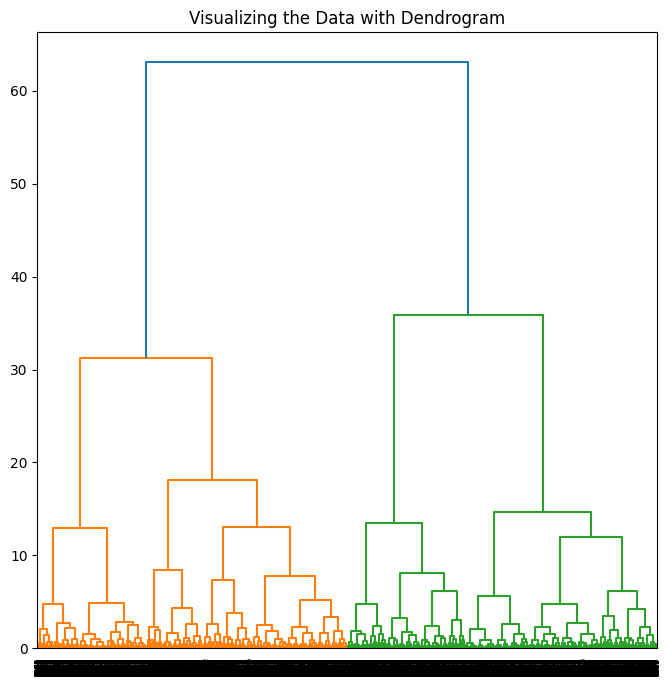

In [4]:
# Visualizing the working of the Dendrograms
# Dendrograms are used to divide a given cluster into many different clusters
plt.figure(figsize=(8, 8))
plt.title('Visualizing the Data with Dendrogram')
Dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()


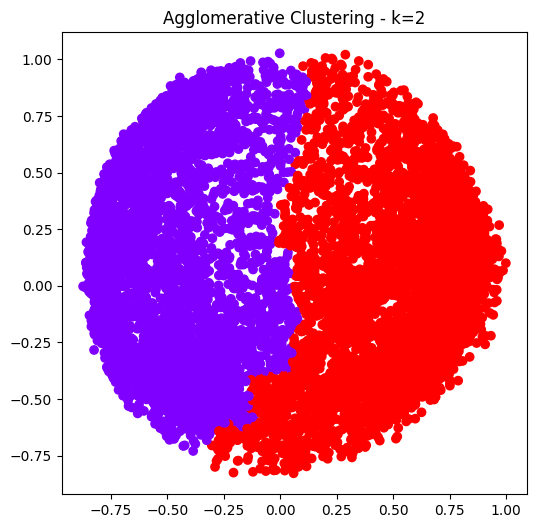

In [5]:
# Building and Visualizing the different clustering models for different values of k

# k = 2
ac2 = AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering - k=2')
plt.show()


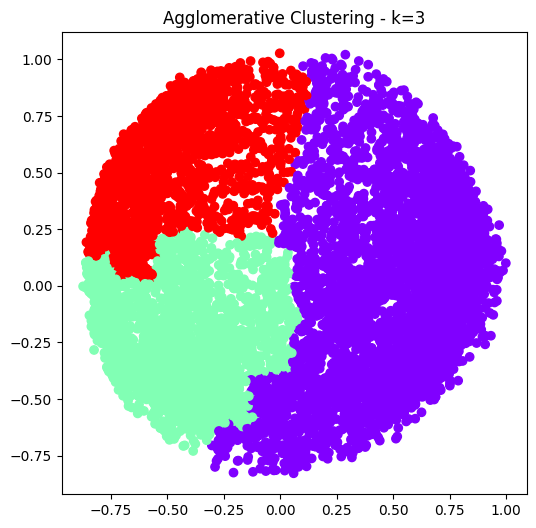

In [6]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters=3)
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac3.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering - k=3')
plt.show()



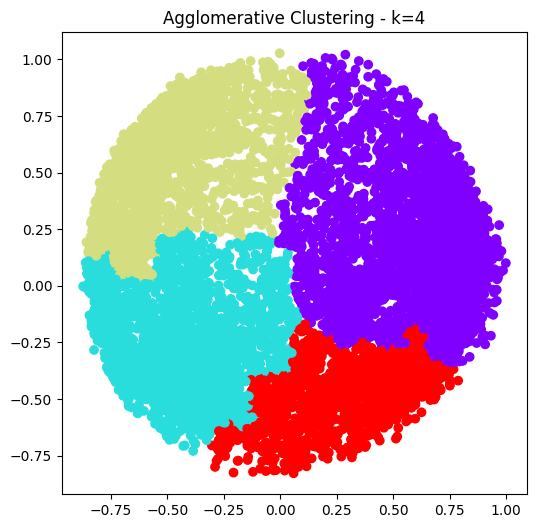

In [7]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac4.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering - k=4')
plt.show()


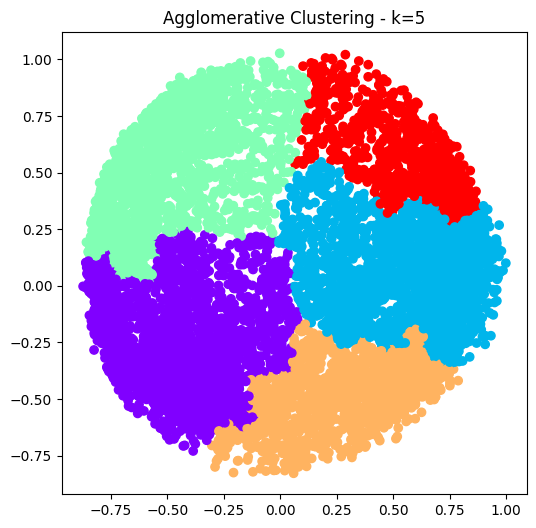

In [8]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters=5)
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac5.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering - k=5')
plt.show()


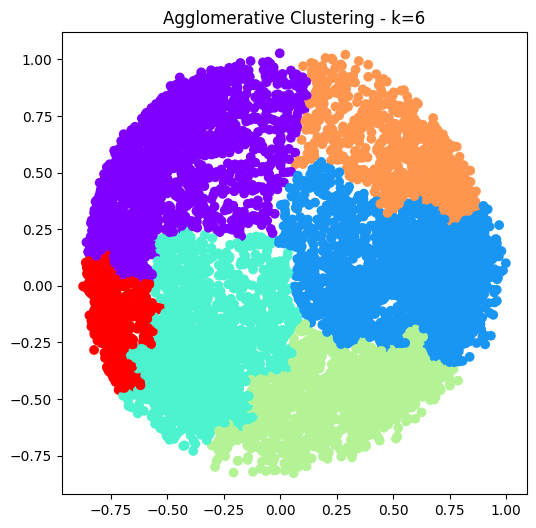

In [9]:
# k = 6
ac6 = AgglomerativeClustering(n_clusters=6)
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac6.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering - k=6')
plt.show()


[0.43736412368405175, 0.41613732409150467, 0.38192141895966464, 0.35363470503020467, 0.3066543118387633]


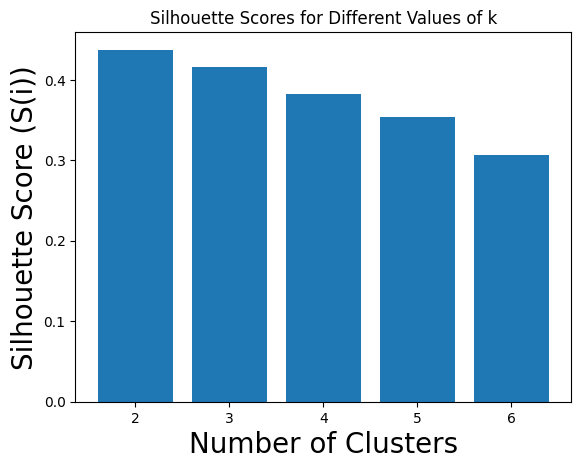

In [10]:
# Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Display silhouette scores
print(silhouette_scores)

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('Silhouette Score (S(i))', fontsize=20)
plt.title('Silhouette Scores for Different Values of k')
plt.show()
